In [1]:
%matplotlib inline

from src.cleaning import preparingDataset, preparingDatasetBis
from src.training import getModelScore, saveTrainedModel
from src.submission import prepareSubmission

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets, svm, metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
diamonds=preparingDatasetBis('./input/data.csv')

In [4]:
diamonds.columns

Index(['carat', 'depth', 'table', 'z', 'price', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [5]:
X=diamonds[['carat', 'depth', 'table', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2']]
y=diamonds.price

In [5]:
diamonds.head()

,carat,depth,table,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.26,61.9,57.0,5.20,12831,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.43,63.2,57.0,5.39,16170,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.80,61.0,57.0,3.67,2797,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.40,63.3,60.0,2.95,630,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.31,61.6,55.0,2.70,698,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
"""stats = diamonds.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats"""

"stats = diamonds.describe().transpose()\nstats['IQR'] = stats['75%'] - stats['25%']\nstats"

In [24]:
#Si aplicamos alguna de las siguientes feature technniques (tanto por separado como juntas), 
#los resultados tienden a ser mucho peores. 

steps = [
    #StandardScaler(),
    #Normalizer(),
    #PCA(n_components=3)
]

pipe = make_pipeline(*steps)

X = pipe.fit_transform(X)

#df = pd.DataFrame(X)

ValueError: not enough values to unpack (expected 2, got 0)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Linear regression**

In [27]:
diamonds_model=LinearRegression()

In [28]:
linreg = diamonds_model.fit(X_train, y_train)

In [29]:
linreg_pred = linreg.predict(X_test)

In [30]:
"""import pickle
# save the model to disk
filename = 'linreg_model.sav'
pickle.dump(diamonds_model, open(filename, 'wb')) """

"import pickle\n# save the model to disk\nfilename = 'linreg_model.sav'\npickle.dump(diamonds_model, open(filename, 'wb')) "

In [31]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, linreg_pred))
print('Mean Squared Error is :', mean_squared_error(y_test, linreg_pred))
print('Coeffients are : ', linreg.coef_)
print('Intercepts are :' ,linreg.intercept_)
print('The R2 square value of Lineal Regression is :', r2_score(y_test, linreg_pred)*100)

Mean Absolute Error is : 753.447342282
Mean Squared Error is : 1548258.69878
Coeffients are :  [  1.08370003e+04   1.85271637e+01  -3.01069363e+01  -1.36750018e+03
  -5.71762058e+02  -5.48289670e+00   2.61640593e+02   1.62023275e+02
   1.53581086e+02   8.17229790e+02   6.13292092e+02   5.31529532e+02
   3.38095229e+02  -1.57744323e+02  -6.25186552e+02  -1.51721577e+03
  -3.79867947e+03   1.54300222e+03  -1.54610994e+02  -1.12813743e+03
   7.36205125e+02   4.45258737e+02   1.21319894e+03   1.14376287e+03]
Intercepts are : 163.267295614
The R2 square value of Lineal Regression is : 90.2498723878


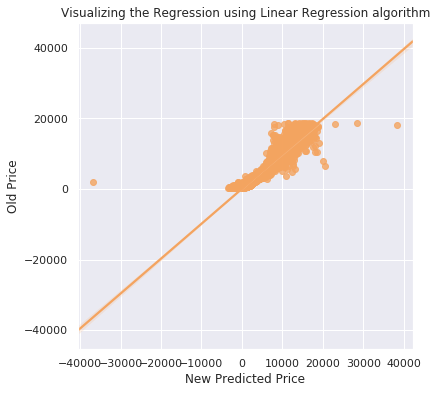

In [32]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Linear Regression algorithm")
sns.regplot(linreg_pred, y_test, color = 'sandybrown')
plt.xlabel('New Predicted Price')
plt.ylabel('Old Price')
plt.show()

**Lasso regression**

In [13]:
linear_model.Lasso(alpha=0.1)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
lassoreg = linear_model.Lasso(alpha=0.1)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
lassopred = lassoreg.predict(X_test)
lassopred[1:5]

array([ 1986.22022056,   323.12841139,  2953.05373013,   742.85135631])

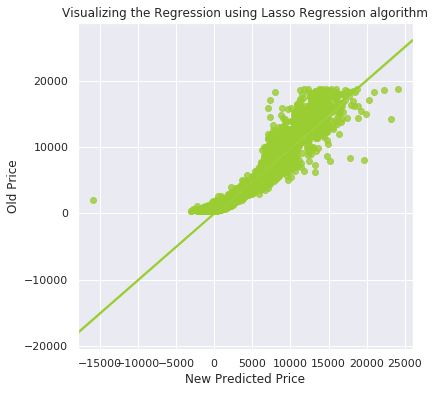

In [16]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Lasso Regression algorithm")
sns.regplot(lassopred, y_test, color = 'yellowgreen')
plt.xlabel('New Predicted Price')
plt.ylabel('Old Price')
plt.show()

In [17]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, lassopred))
print('Mean Squared Error is :', mean_squared_error(y_test, lassopred))
print('Coeffients are : ', lassoreg.coef_)
print('Intercepts are :' ,lassoreg.intercept_)
print('The R2 square value of Lasso is :', r2_score(y_test, lassopred)*100)

Mean Absolute Error is : 757.777940455
Mean Squared Error is : 1324038.31861
Coeffients are :  [ 819119.93326903     929.73266654      -0.          -55217.4599801
  -32815.91445717    -983.80690082    6657.77806686       0.               0.
   31906.15097576   15914.89447487    9952.23800084      -0.
  -37214.99762378  -70712.86059779 -138639.61080759 -318130.81470472
   63372.77925163  -59668.99511053 -135472.36733129    8609.6106438
   -6800.06182132   47023.44758854   42770.82099067]
Intercepts are : -1652.93403595
The R2 square value of Lasso is : 91.5669501379


**elasticNet**

In [70]:
eln = ElasticNet()
eln.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
eln.score(X_test, y_test)

0.4540699857189624

**Random Forest Regressor**

In [7]:
rforest = RandomForestRegressor(n_estimators=250)
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
rforest_pred = rforest.predict(X_test)

In [10]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, rforest_pred))
print('Mean Squared Error is :', mean_squared_error(y_test, rforest_pred)**0.5)
print('The R2 square value of Random Forest Regressor is :', r2_score(y_test, rforest_pred)*100)

Mean Absolute Error is : 287.315719437
Mean Squared Error is : 549.232450295
The R2 square value of Random Forest Regressor is : 98.0838955714


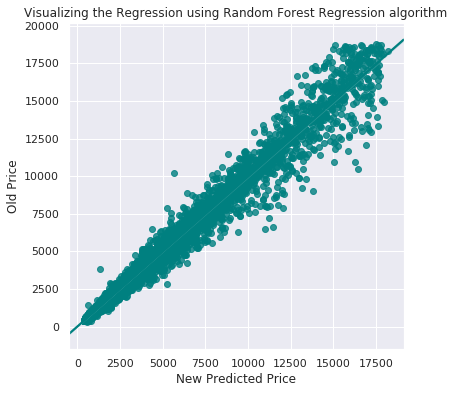

In [36]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Random Forest Regression algorithm")
sns.regplot(rforest_pred, y_test, color = 'teal')
plt.xlabel('New Predicted Price')
plt.ylabel('Old Price')
plt.show()

**Gradient Boosting Regressor**

In [37]:
grad_reg = GradientBoostingRegressor()
grad_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [38]:
grad_reg_pred = grad_reg.predict(X_test)

In [39]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, grad_reg_pred))
print('Mean Squared Error is :', mean_squared_error(y_test, grad_reg_pred))
print('The R2 square value of Gradient Boosting Regressor is :', r2_score(y_test, grad_reg_pred)*100)

Mean Absolute Error is : 414.172059494
Mean Squared Error is : 566441.549729
The R2 square value of Gradient Boosting Regressor is : 96.432845881


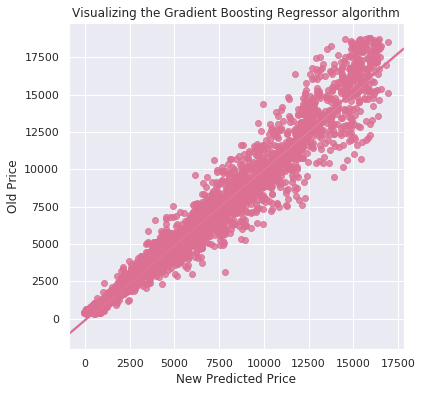

In [79]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Gradient Boosting Regressor algorithm")
sns.regplot(grad_reg_pred, y_test, color = 'palevioletred')
plt.xlabel('New Predicted Price')
plt.ylabel('Old Price')
plt.show()

In [4]:
models = {
    'Linear Regression': LinearRegression(),
    "Lasso Regression": linear_model.Lasso(alpha=0.1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    #"KNeighborsRegressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
}

for modelName, model in models.items():
    print("Training model: {}".format(modelName))
    mod=getModelScore(diamonds, model)
    print('--------')
    saveTrainedModel(mod,"{}".format(modelName))
    prepareSubmission('./models/{}.sav'.format(modelName),'{}'.format(modelName))

Training model: Lasso Regression


/home/eduardo/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Mean Absolute Error is : 796.631543132
Mean Squared Error is : 1328220.37383
The R2 square value is : 91.6052902085
--------
Training model: DecisionTreeRegressor
Mean Absolute Error is : 374.022226342
Mean Squared Error is : 581675.638368
The R2 square value is : 96.5318070312
--------
Training model: Gradient Boosting Regressor
Mean Absolute Error is : 415.600526444
Mean Squared Error is : 577229.777166
The R2 square value is : 96.3857741405
--------
Training model: Random Forest Regressor
Mean Absolute Error is : 296.873545446
Mean Squared Error is : 326422.637998
The R2 square value is : 97.9057884539
--------
Training model: Linear Regression
Mean Absolute Error is : 809.400907339
Mean Squared Error is : 1366358.27313
The R2 square value is : 91.4447524688
--------


### Ejemplo del pipeline con un único modelo


In [2]:
#preparamos el dataset
#diamonds=preparingDataset('./input/data.csv')
diamonds=preparingDatasetBis('./input/data.csv')


In [3]:
#obtenemos el score del modelo
decisitiontree=(getModelScore(diamonds,DecisionTreeRegressor(random_state=0)))

Mean Absolute Error is : 357.913488238
Mean Squared Error is : 526857.416468
The R2 square value is : 96.6373752924


In [4]:
#salvamos el modelo entrenado
saveTrainedModel(randomf,'randomforest_estimators250conz')

In [5]:
#cargamos dataset test, calculamos predicción con modelo entrenado y exportamos csv. 
prepareSubmission('./models/randomforest_estimators250conz.sav','randomforest_est250_conz')

### Aplicando GridSearchCV para Random Forest Regressor

Como modelo que mejor Score ha tenido, buscamos los mejores parámetros

In [5]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score

/home/eduardo/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/eduardo/.local/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
